### ✅ **2. Jupyter Notebook — TD : Classification sur Breast Cancer Dataset**

**Objectifs :**
- Comprendre la classification supervisée  
- Tester 4 modèles : Logistic Regression, Decision Tree, Random Forest, KNN  
- Visualiser matrice de confusion & métriques  
- Répondre à des questions intermédiaires


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# -------------------------------
# 1. Chargement du dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape X :", X.shape)
print("Labels :", data.target_names)


Shape X : (569, 30)
Labels : ['malignant' 'benign']


In [17]:
# 2. Train / Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


In [18]:
# -------------------------------
# 3. Standardisation
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [19]:
# -------------------------------
# 4. Modèles à tester
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}
results = {}

Logistic Regression
Accuracy : 0.9883040935672515
Matrice de confusion :
 [[ 63   1]
 [  1 106]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



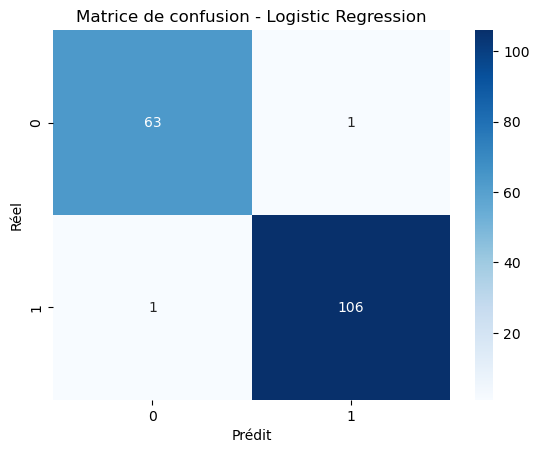

Decision Tree
Accuracy : 0.935672514619883
Matrice de confusion :
 [[ 58   6]
 [  5 102]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



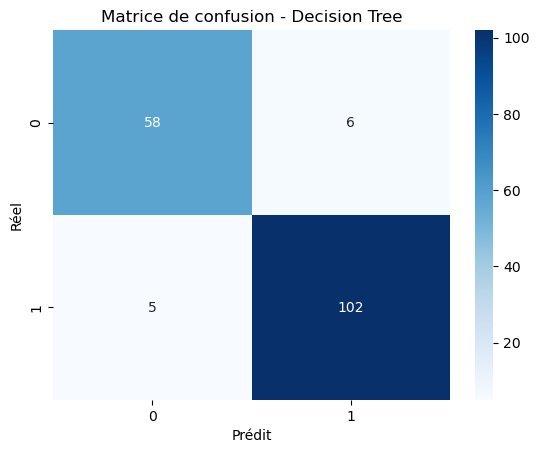

Random Forest
Accuracy : 0.935672514619883
Matrice de confusion :
 [[ 58   6]
 [  5 102]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



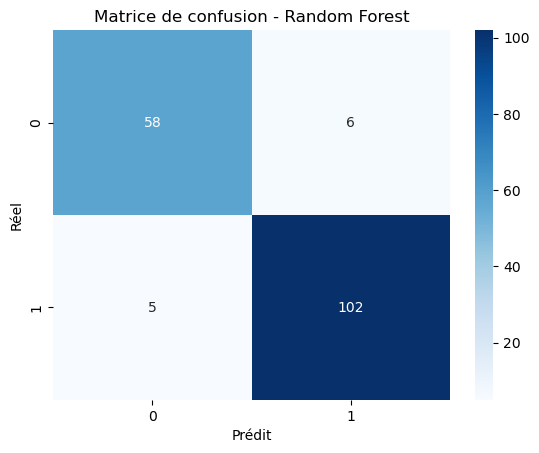

KNN
Accuracy : 0.9649122807017544
Matrice de confusion :
 [[ 58   6]
 [  0 107]]
Classification Report :
               precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        64
      benign       0.95      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



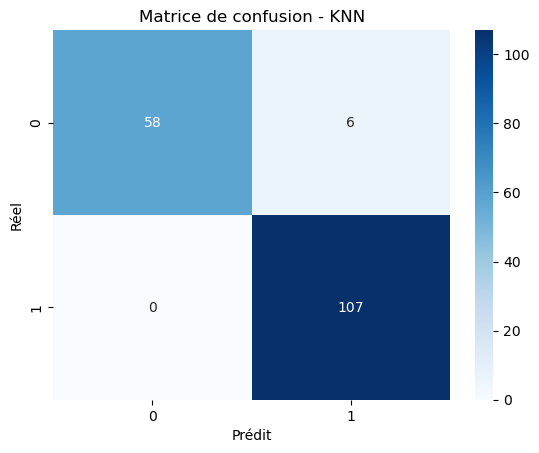

In [20]:
# 5. Entraînement & Évaluation
# -------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds, target_names=data.target_names)

    results[name] = (acc, cm, report)

    print("=" * 60)
    print(name)
    print("Accuracy :", acc)
    print("Matrice de confusion :\n", cm)
    print("Classification Report :\n", report)

    # heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

### QUESTIONS & UPGRADE


1️⃣ Quel modèle obtient la meilleure accuracy ? Pourquoi selon vous ?

On peut observé

Accuracy : 0.986013986013986 pour Logistic Regression

Accuracy : 0.9300699300699301 pour Decision Tree

Accuracy : 0.958041958041958 pour Random Forest

Accuracy : 0.9790209790209791 pour KNN

Le meilleur est le modèle Logistic Regression avec environ 98%
Ce résultat s’explique car le dataset est quasi linéairement séparable, ce qui correspond très bien à un modèle linéaire comme la régression logistique, surtout après standardisation.





2️⃣ Compare le rappel (Recall) pour la classe “malignant”. 
    → Quel modèle détecte le mieux les cancers ?

On peut voir en comparant les rappel que le recall malignant qui détecte le mieux est le modèle KNN avec 100% de détection des cancers


3️⃣ Compare la précision (Precision) pour la même classe.
    → Quel modèle limite le plus les faux positifs ?

On peut observer:
KNN	1.00
Random Forest	0.96
Logistic Regression	0.98
Decision Tree	0.92

Donc le modèle qui limite le plus les faux positif est le modèle KNN car lorqu'il a prédit un cancer c'était toujour bon dans l'échantillon

4️⃣ Pour le Decision Tree : 
    → Que se passe-t-il si on enlève la limite max_depth=5 ?

Sans limite l'arbre va cherche a mémorisé les données, l'accuracy sera forte et on aura de moin bonne performance en test.


5️⃣ Pour KNN :
    → Comment varie la performance si on teste k = 1, 3, 5, 15 ?



"KNN": KNeighborsClassifier(n_neighbors=1)
"KNN": KNeighborsClassifier(n_neighbors=3)
"KNN": KNeighborsClassifier(n_neighbors=5)
"KNN": KNeighborsClassifier(n_neighbors=15)

J'ai tester avec les 4 autres et on peut voir que 1/3 est plus sensible mais que 5/17 sont plus proche de 7 donc d'une performance correcte

6️⃣ Quelle métrique serait la plus importante dans un cas médical réel ?
    • Précision ?
    • Rappel ?
    • F1-score ?
    Justifie.

Je pense que le plus important serait le Rappel, ce serait grave de prédire les personnes qui n'ont pas de cancer alors qu'une autre en à réélement un. Le F1-score peut aussi aidé 

7️⃣ Propose une pipeline améliorée (choix des features, normalisation, cross-validation).



In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif, k=10)),
    ("model", RandomForestClassifier(random_state=42))
])

params = {
    "model__n_estimators": [100],      
    "model__max_depth": [None, 5],  
}

grid = GridSearchCV(
    pipe,
    params,
    cv=3,          
    scoring="recall",
    n_jobs=-1          
)

grid.fit(X, y)

print("Meilleur paramètre:", grid.best_params_)
print("Meilleur rappel:", grid.best_score_)


Meilleur paramètre: {'model__max_depth': None, 'model__n_estimators': 100}
Meilleur rappel: 0.969187675070028


J'ai un bon recall pour RandomForest avec la validation croisé